In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system ==

In [ ]:
import nltk
from nltk import Tree
import os
import numpy as np
from datasets import load_dataset

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import numpy as np
import re
from nltk.tree import Tree
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Replace weird quotation marks
    text = text.replace("``", '"').replace("''", '"')

    # Remove unwanted punctuation (keep sentiment-related ones)
    text = re.sub(r'[^a-zA-Z0-9\s!?\']', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

def extract_data(file_path):
    sentences = []
    labels = []

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line:
                tree = Tree.fromstring(line)
                label = int(tree.label())
                sentence = ' '.join(tree.leaves())
                # sentence = clean_text(sentence)
                sentences.append(sentence)
                labels.append(label)

    return sentences, np.array(labels)

In [ ]:
dataset_path = "/content/drive/MyDrive/datas/sst5"
train_sentences, train_labels = extract_data(os.path.join(dataset_path, "train.txt"))
dev_sentences, dev_labels = extract_data(os.path.join(dataset_path, "dev.txt"))
test_sentences, test_labels = extract_data(os.path.join(dataset_path, "test.txt"))

In [ ]:
dataset = load_dataset("SetFit/sst5")
train_sentences = dataset["train"]["text"]
train_labels = dataset["train"]["label"]
dev_sentences = dataset["validation"]["text"]
dev_labels = dataset["validation"]["label"]
test_sentences = dataset["test"]["text"]
test_labels = dataset["test"]["label"]

Repo card metadata block was not found. Setting CardData to empty.


In [ ]:
for i in range(3):
    print(train_sentences[i])
    print(train_labels[i])
print()

for i in range(3):
    print(dev_sentences[i])
    print(dev_labels[i])
print()

for i in range(3):
    print(test_sentences[i])
    print(test_labels[i])

The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .
3
The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth .
4
Singer\/composer Bryan Adams contributes a slew of songs -- a few potential hits , a few more simply intrusive to the story -- but the whole package certainly captures the intended , er , spirit of the piece .
3

It 's a lovely film with lovely performances by Buy and Accorsi .
3
No one goes unindicted here , which is probably for the best .
2
And if you 're not nearly moved to tears by a couple of scenes , you 've got ice water in your veins .
3

Effective but too-tepid biopic
2
If you sometimes like to go to the movies to have fun , Wasabi is a good place to start .
3
Emerges a

# Data analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

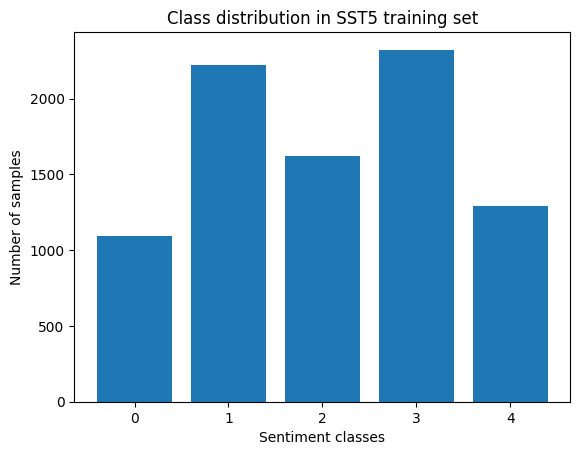

In [ ]:
label_counts = Counter(train_labels)
plt.bar(label_counts.keys(), label_counts.values())

plt.xlabel("Sentiment classes")
plt.ylabel("Number of samples")
plt.title("Class distribution in SST5 training set")
plt.show()

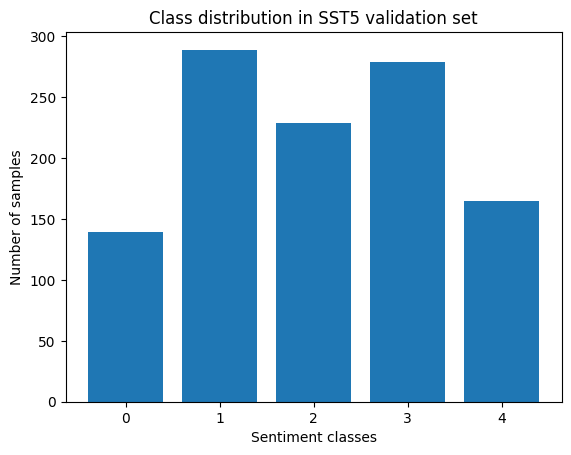

In [ ]:
label_counts = Counter(dev_labels)
plt.bar(label_counts.keys(), label_counts.values())

plt.xlabel("Sentiment classes")
plt.ylabel("Number of samples")
plt.title("Class distribution in SST5 validation set")
plt.show()

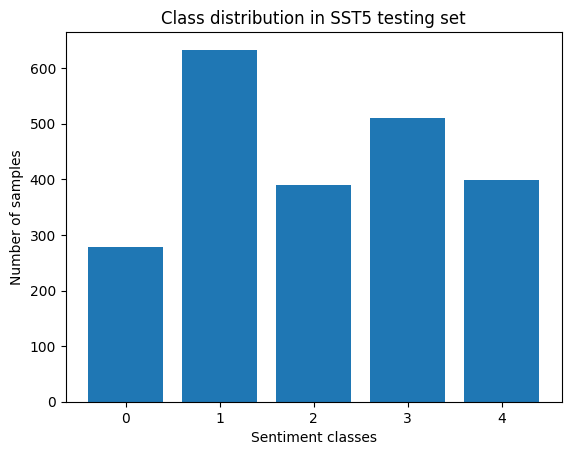

In [ ]:
label_counts = Counter(test_labels)
plt.bar(label_counts.keys(), label_counts.values())

plt.xlabel("Sentiment classes")
plt.ylabel("Number of samples")
plt.title("Class distribution in SST5 testing set")
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
train_text = " ".join(train_sentences)

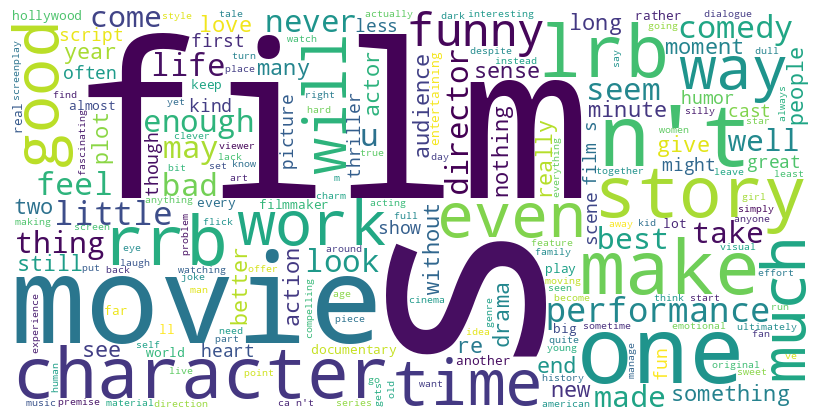

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(train_text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [ ]:
test_text = " ".join(test_sentences)

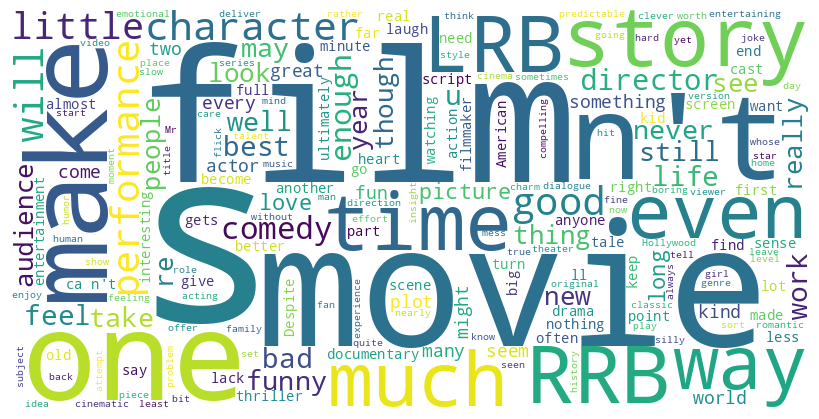

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(test_text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [ ]:
print(f"Number of training samples: {len(train_sentences)}")
print(f"Number of validation samples: {len(dev_sentences)}")
print(f"Number of test samples: {len(test_sentences)}")

Number of training samples: 8544
Number of validation samples: 1101
Number of test samples: 2210


In [ ]:
print(f"Total number of samples: {len(train_sentences) + len(dev_sentences) + len(test_sentences)}")

Total number of samples: 11855


In [ ]:
label_to_text = {0: "Very Negative", 1: "Negative", 2: "Neutral", 3: "Positive", 4: "Very Positive"}

for label in sorted(set(train_labels)):
    index = np.where(train_labels == label)[0][0] # Get first occurrence
    print(f"Sentiment: {label_to_text[label]}")
    print(f"Example: {train_sentences[index]}")
    print()

Sentiment: Very Negative
Example: ... a sour little movie at its core ; an exploration of the emptiness that underlay the relentless gaiety of the 1920 's ... The film 's ending has a `` What was it all for ? ''

Sentiment: Negative
Example: This is n't a new idea .

Sentiment: Neutral
Example: You 'd think by now America would have had enough of plucky British eccentrics with hearts of gold .

Sentiment: Positive
Example: The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .

Sentiment: Very Positive
Example: The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth .



In [ ]:
sentence_lengths = [len(sentence.split()) for sentence in train_sentences]

longest_index = np.argmax(sentence_lengths)
shortest_index = np.argmin(sentence_lengths)

print(f"Longest sentence ({sentence_lengths[longest_index]} words): {train_sentences[longest_index]}")
print(f"Shortest sentence ({sentence_lengths[shortest_index]} words): {train_sentences[shortest_index]}")

Longest sentence (49 words): It may not be as cutting as witty or as true as back in the glory days of Weekend and Two or Three Things I Know About Her but who else engaged in filmmaking today is so cognizant of the cultural and moral issues involved in the process ?
Shortest sentence (1 words): Cool


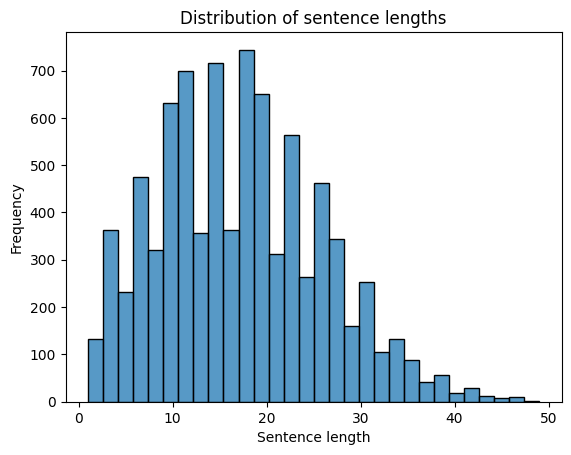

In [ ]:
sns.histplot(sentence_lengths, bins=30)
plt.xlabel("Sentence length")
plt.ylabel("Frequency")
plt.title("Distribution of sentence lengths")
plt.show()

In [ ]:
from collections import defaultdict

def remove_stopwords(text):
    words = text.split()
    important_stopwords = {"not", "no", "never"}
    words = [word for word in words if word.lower() not in stop_words or word.lower() in important_stopwords]
    text = ' '.join(words)

    return text

word_counts = defaultdict(Counter)

for sentence, label in zip(train_sentences, train_labels):
    new_sentence = remove_stopwords(sentence)
    words = new_sentence.lower().split()
    word_counts[label].update(words)

for label in sorted(word_counts.keys()):
    most_common_words = word_counts[label].most_common(15)
    print(f"Most common words in {label_to_text[label]}:")
    print(most_common_words)
    print()

Most common words in Very Negative:
[("'s", 301), ('movie', 185), ('film', 132), ("n't", 108), ('one', 76), ('like', 73), ('not', 72), ('bad', 66), ('no', 59), ("'", 57), ('even', 52), ('lrb', 43), ('rrb', 43), ('story', 40), ('comedy', 36)]

Most common words in Negative:
[("'s", 655), ('movie', 275), ('film', 263), ("n't", 253), ('like', 182), ('not', 163), ('one', 128), ("'", 123), ('rrb', 99), ('no', 98), ('much', 98), ('lrb', 98), ('story', 86), ('even', 72), ('characters', 72)]

Most common words in Neutral:
[("'s", 519), ('film', 206), ('movie', 168), ('not', 159), ("n't", 147), ('one', 109), ('like', 90), ("'", 83), ('lrb', 70), ('rrb', 69), ('story', 63), ('?', 58), ('much', 56), ('good', 50), ('no', 49)]

Most common words in Positive:
[("'s", 731), ('film', 356), ('movie', 214), ('not', 150), ("n't", 146), ('one', 125), ('story', 116), ("'", 114), ('like', 111), ('lrb', 95), ('rrb', 95), ('good', 89), ('even', 70), ('way', 69), ('funny', 69)]

Most common words in Very Posit

In [ ]:
def plot_confusion_mat(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(title)
    plt.show()

# Multinomial Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
vectorizer = TfidfVectorizer(max_features=20000, stop_words='english', ngram_range=(1, 2))
X_train = vectorizer.fit_transform(train_sentences)
X_dev = vectorizer.transform(dev_sentences)
X_test = vectorizer.transform(test_sentences)

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, train_labels)

MultinomialNB()

In [ ]:
train_preds = nb_classifier.predict(X_train)
dev_preds = nb_classifier.predict(X_dev)
test_preds = nb_classifier.predict(X_test)

In [ ]:
print(f"Train accuracy: {accuracy_score(train_labels, train_preds):.4f}")
print(f"Dev accuracy: {accuracy_score(dev_labels, dev_preds):.4f}")
print(f"Test accuracy: {accuracy_score(test_labels, test_preds):.4f}")

Train accuracy: 0.6831
Dev accuracy: 0.3678
Test accuracy: 0.3819


In [ ]:
print("\nTest set classification report:")
print(classification_report(test_labels, test_preds, digits=4))


Test set classification report:
              precision    recall  f1-score   support

           0     0.5000    0.0108    0.0211       279
           1     0.4374    0.6398    0.5196       633
           2     0.3243    0.0308    0.0563       389
           3     0.3328    0.7882    0.4680       510
           4     0.6667    0.0551    0.1019       399

    accuracy                         0.3819      2210
   macro avg     0.4522    0.3050    0.2334      2210
weighted avg     0.4426    0.3819    0.2878      2210



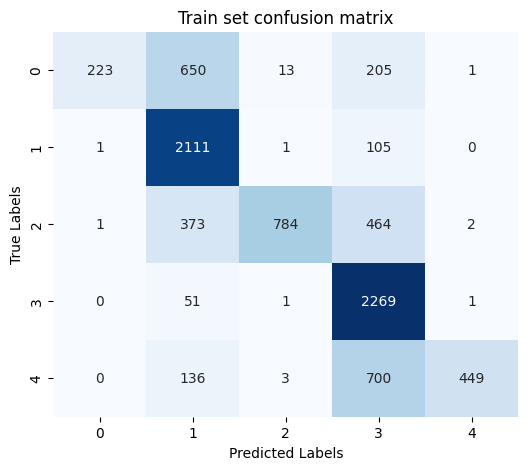

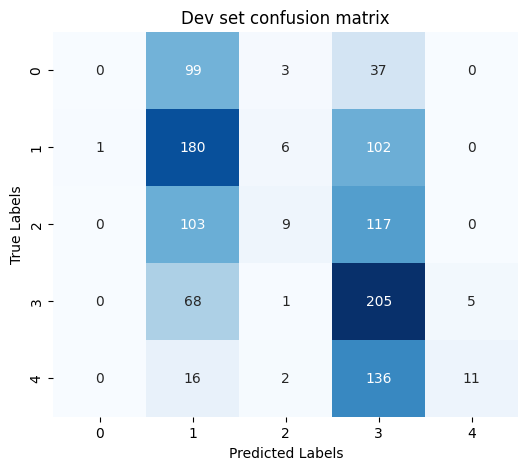

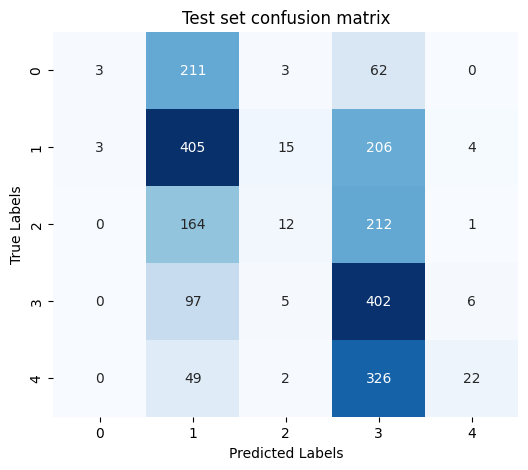

In [ ]:
plot_confusion_mat(confusion_matrix(train_labels, train_preds), "Train set confusion matrix")
plot_confusion_mat(confusion_matrix(dev_labels, dev_preds), "Dev set confusion matrix")
plot_confusion_mat(confusion_matrix(test_labels, test_preds), "Test set confusion matrix")

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression(max_iter=1000, C=1.0, solver='lbfgs')
log_reg.fit(X_train, train_labels)

LogisticRegression(max_iter=1000)

In [ ]:
train_preds = log_reg.predict(X_train)
dev_preds = log_reg.predict(X_dev)
test_preds = log_reg.predict(X_test)

In [ ]:
print(f"Train accuracy: {accuracy_score(train_labels, train_preds):.4f}")
print(f"Dev accuracy: {accuracy_score(dev_labels, dev_preds):.4f}")
print(f"Test accuracy: {accuracy_score(test_labels, test_preds):.4f}")

Train accuracy: 0.8222
Dev accuracy: 0.3669
Test accuracy: 0.4054


In [ ]:
print("\nTest set classification report:")
print(classification_report(test_labels, test_preds, digits=4))


Test set classification report:
              precision    recall  f1-score   support

           0     0.4568    0.1326    0.2056       279
           1     0.4427    0.5924    0.5068       633
           2     0.2333    0.1080    0.1476       389
           3     0.3653    0.6725    0.4734       510
           4     0.6074    0.2481    0.3523       399

    accuracy                         0.4054      2210
   macro avg     0.4211    0.3507    0.3371      2210
weighted avg     0.4195    0.4054    0.3699      2210



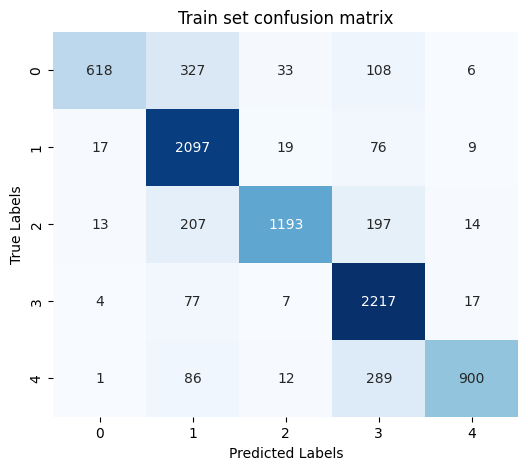

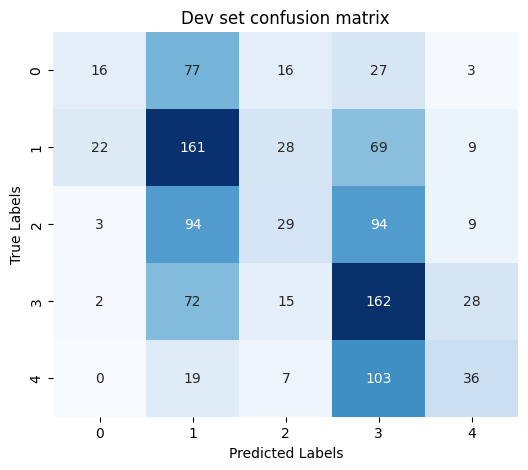

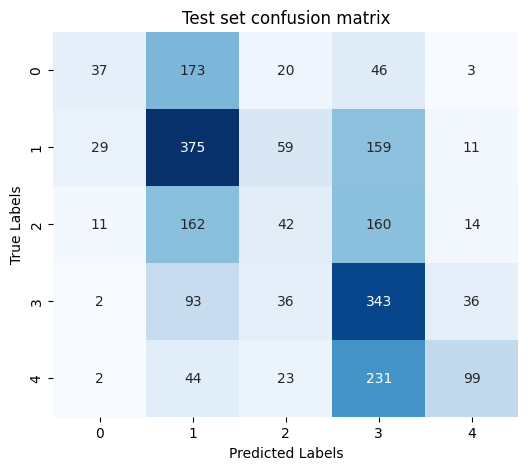

In [ ]:
plot_confusion_mat(confusion_matrix(train_labels, train_preds), "Train set confusion matrix")
plot_confusion_mat(confusion_matrix(dev_labels, dev_preds), "Dev set confusion matrix")
plot_confusion_mat(confusion_matrix(test_labels, test_preds), "Test set confusion matrix")

# BERT Base

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

In [ ]:
# bert tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# hugging face dataset format
train_data = Dataset.from_dict({"text": train_sentences, "label": train_labels})
dev_data = Dataset.from_dict({"text": dev_sentences, "label": dev_labels})
test_data = Dataset.from_dict({"text": test_sentences, "label": test_labels})

In [ ]:
# tokenize dataset
train_data = train_data.map(tokenize_function, batched=True)
dev_data = dev_data.map(tokenize_function, batched=True)
test_data = test_data.map(tokenize_function, batched=True)

Map:   0%|          | 0/8544 [00:00<?, ? examples/s]

Map:   0%|          | 0/1101 [00:00<?, ? examples/s]

Map:   0%|          | 0/2210 [00:00<?, ? examples/s]

In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    report_to="none",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=500,
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return {"accuracy": accuracy_score(labels, predictions)}

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=5) # pre-trained model

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=dev_data,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-14-2fbe6ff9af92>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,1.252700,1.163103,0.461399
2,0.909700,1.147219,0.522252
3,0.611200,1.383149,0.512262


TrainOutput(global_step=1602, training_loss=0.901346061411273, metrics={'train_runtime': 588.4107, 'train_samples_per_second': 43.561, 'train_steps_per_second': 2.723, 'total_flos': 1686061056909312.0, 'train_loss': 0.901346061411273, 'epoch': 3.0})

In [ ]:
predictions = trainer.predict(test_data)
test_preds = np.argmax(predictions.predictions, axis=1)
print(f"Test accuracy: {accuracy_score(test_labels, test_preds):.4f}")

Test accuracy: 0.5362


In [ ]:
print("\nTest set classification report:")
print(classification_report(test_labels, test_preds, digits=4))


Test set classification report:
              precision    recall  f1-score   support

           0     0.5616    0.4409    0.4940       279
           1     0.5798    0.5624    0.5710       633
           2     0.3644    0.4319    0.3953       389
           3     0.5331    0.6000    0.5646       510
           4     0.6784    0.5815    0.6262       399

    accuracy                         0.5362      2210
   macro avg     0.5435    0.5233    0.5302      2210
weighted avg     0.5466    0.5362    0.5388      2210



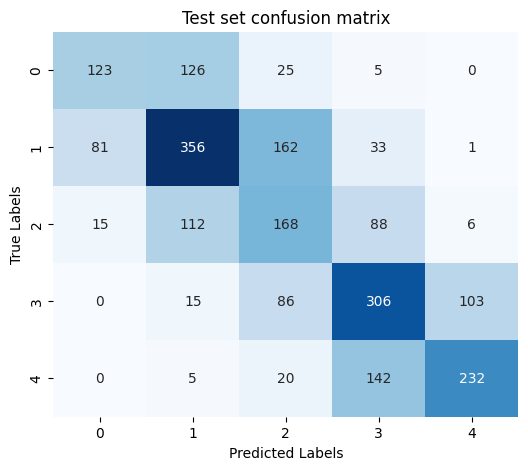

In [ ]:
plot_confusion_mat(confusion_matrix(test_labels, test_preds), "Test set confusion matrix")

# BERT Large

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-large-uncased")
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

In [ ]:
# hugging face dataset format
train_data = Dataset.from_dict({"text": train_sentences, "label": train_labels})
dev_data = Dataset.from_dict({"text": dev_sentences, "label": dev_labels})
test_data = Dataset.from_dict({"text": test_sentences, "label": test_labels})

In [ ]:
# tokenize dataset
train_data = train_data.map(tokenize_function, batched=True)
dev_data = dev_data.map(tokenize_function, batched=True)
test_data = test_data.map(tokenize_function, batched=True)

Map:   0%|          | 0/8544 [00:00<?, ? examples/s]

Map:   0%|          | 0/1101 [00:00<?, ? examples/s]

Map:   0%|          | 0/2210 [00:00<?, ? examples/s]

In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    report_to="none",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=500,
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return {"accuracy": accuracy_score(labels, predictions)}

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-large-uncased", num_labels=5) # pre-trained model

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=dev_data,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-large-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-16-4bbe12448634>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.946300,1.409474,0.450500
2,0.679600,1.330478,0.502271
3,0.396800,1.779990,0.503179


Epoch,Training Loss,Validation Loss


TrainOutput(global_step=1602, training_loss=0.6501428125502912, metrics={'train_runtime': 1927.4926, 'train_samples_per_second': 13.298, 'train_steps_per_second': 0.831, 'total_flos': 6098620658860032.0, 'train_loss': 0.6501428125502912, 'epoch': 3.0})

In [ ]:
predictions = trainer.predict(test_data)
test_preds = np.argmax(predictions.predictions, axis=1)
print(f"Test accuracy: {accuracy_score(test_labels, test_preds):.4f}")

Test accuracy: 0.5489


In [ ]:
print("\nTest set classification report:")
print(classification_report(test_labels, test_preds, digits=4))


Test set classification report:
              precision    recall  f1-score   support

           0     0.5692    0.3978    0.4684       279
           1     0.6080    0.6003    0.6041       633
           2     0.3850    0.4473    0.4138       389
           3     0.5331    0.6314    0.5781       510
           4     0.6766    0.5664    0.6166       399

    accuracy                         0.5489      2210
   macro avg     0.5544    0.5287    0.5362      2210
weighted avg     0.5590    0.5489    0.5497      2210



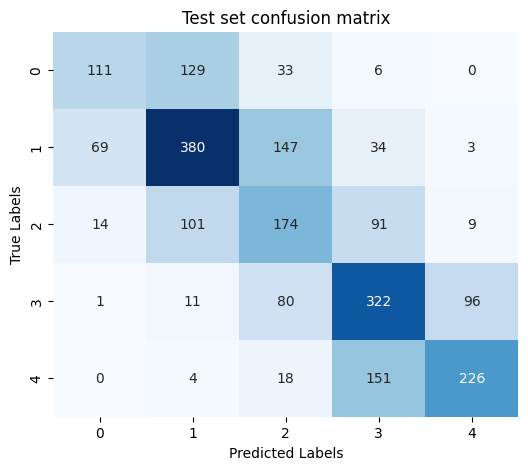

In [ ]:
plot_confusion_mat(confusion_matrix(test_labels, test_preds), "Test set confusion matrix")

In [ ]:
model.save_pretrained("/content/drive/MyDrive/datas/bert-large-model/")
tokenizer.save_pretrained("/content/drive/MyDrive/datas/bert-large-model/")

('/content/drive/MyDrive/datas/bert-large-model/tokenizer_config.json',
 '/content/drive/MyDrive/datas/bert-large-model/special_tokens_map.json',
 '/content/drive/MyDrive/datas/bert-large-model/vocab.txt',
 '/content/drive/MyDrive/datas/bert-large-model/added_tokens.json')

In [ ]:
model = BertForSequenceClassification.from_pretrained("/content/drive/MyDrive/datas/bert-large-model/")
tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/datas/bert-large-model/")

NameError: name 'AutoTokenizer' is not defined

In [ ]:
def predict_sentiment(model, tokenizer, sentence):
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True)
    inputs = {key: value.to(model.device) for key, value in inputs.items()}

    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)

    predicted_label = torch.argmax(outputs.logits, dim=1).item()

    class_names = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]
    return class_names[predicted_label]

user_sentence = "I absolutely hate this movie!"
predicted_sentiment = predict_sentiment(model, tokenizer, user_sentence)
print(f"Predicted sentiment: {predicted_sentiment}")

# Custom Encoder-Only Transformer

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import AutoTokenizer

In [ ]:
class MLPClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(MLPClassifier, self).__init__()
        layers = []
        in_dim = input_dim
        for h_dim in hidden_dims:
            layers.append(nn.Linear(in_dim, h_dim))
            layers.append(nn.ReLU())
            in_dim = h_dim
        layers.append(nn.Linear(in_dim, output_dim))
        self.mlp = nn.Sequential(*layers)

    def forward(self, x):
        return self.mlp(x)

In [ ]:
class CustomTransformer(nn.Module):
    def __init__(self, vocab_size, embed_dim=256, num_heads=8, num_layers=6, hidden_dim=512, num_classes=5, device=None):
        super(CustomTransformer, self).__init__()

        self.device = device if device else torch.device("cuda" if torch.cuda.is_available() else "cpu")

        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.positional_encoding = nn.Parameter(torch.randn(1, 512, embed_dim)) # Max length = 512

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=num_heads,
            dim_feedforward=hidden_dim,
            activation="relu",
            batch_first=True
        )
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.classifier = MLPClassifier(embed_dim, [512, 256], num_classes)

    def forward(self, input_ids, attention_mask=None):
        x = self.embedding(input_ids) + self.positional_encoding[:, :input_ids.shape[1], :]

        # Attention mask to bool (True for padding, False for valid token)
        if attention_mask is not None:
            attention_mask = attention_mask == 0

        x = self.encoder(x, src_key_padding_mask=attention_mask)
        x = x[:, 0, :] # Take the CLS token representation
        return self.classifier(x)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=50, return_tensors="pt")

train_data = train_data.map(tokenize_function, batched=True)
dev_data = dev_data.map(tokenize_function, batched=True)
test_data = test_data.map(tokenize_function, batched=True)

Map:   0%|          | 0/8544 [00:00<?, ? examples/s]

Map:   0%|          | 0/1101 [00:00<?, ? examples/s]

Map:   0%|          | 0/2210 [00:00<?, ? examples/s]

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

def convert_to_dataloader(dataset, batch_size=16):
    input_ids = torch.tensor(dataset["input_ids"])
    attention_mask = torch.tensor(dataset["attention_mask"])
    labels = torch.tensor(dataset["label"])

    tensor_dataset = TensorDataset(input_ids, attention_mask, labels)
    return DataLoader(tensor_dataset, batch_size=batch_size, shuffle=True)

train_loader = convert_to_dataloader(train_data)
dev_loader = convert_to_dataloader(dev_data)
test_loader = convert_to_dataloader(test_data)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CustomTransformer(vocab_size=len(tokenizer)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=3e-5)

def train(model, train_loader, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        for input_ids, attention_mask, labels in train_loader:
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            correct += (outputs.argmax(1) == labels).sum().item()

        print(f"Epoch {epoch+1}: Loss = {total_loss/len(train_loader)}, Accuracy = {correct/len(train_loader.dataset):.4f}")

train(model, train_loader, epochs=5)

Epoch 1: Loss = 1.5699612290671703, Accuracy = 0.2767
Epoch 2: Loss = 1.539702938960286, Accuracy = 0.3113
Epoch 3: Loss = 1.4933157203795757, Accuracy = 0.3412
Epoch 4: Loss = 1.4452572978391183, Accuracy = 0.3689
Epoch 5: Loss = 1.3892098651843126, Accuracy = 0.4040


In [ ]:
class_names = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]


model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for input_ids, attention_mask, labels in test_loader:
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask)
        predictions = outputs.argmax(1)

        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

In [ ]:
print(classification_report(all_labels, all_predictions))

              precision    recall  f1-score   support

           0       0.26      0.07      0.11       279
           1       0.37      0.50      0.43       633
           2       0.27      0.14      0.18       389
           3       0.31      0.40      0.35       510
           4       0.39      0.42      0.40       399

    accuracy                           0.34      2210
   macro avg       0.32      0.31      0.29      2210
weighted avg       0.33      0.34      0.32      2210



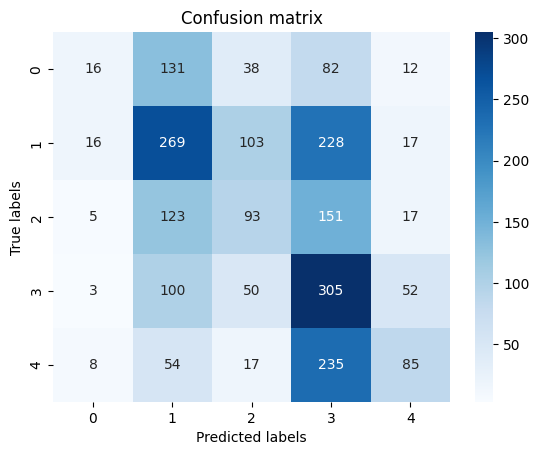

In [ ]:
cm = confusion_matrix(all_labels, all_predictions)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion matrix")
plt.show()

In [ ]:
def predict_sentiment(model, tokenizer, sentence):
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True)
    inputs = {key: value.to(model.device) for key, value in inputs.items()}

    model.eval()
    with torch.no_grad():
        outputs = model(inputs["input_ids"], inputs.get("attention_mask"))

    predicted_label = torch.argmax(outputs, dim=1).item()

    class_names = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]
    return class_names[predicted_label]

user_sentence = "I love this movie!"
predicted_sentiment = predict_sentiment(model, tokenizer, user_sentence)
print(f"Predicted sentiment: {predicted_sentiment}")

Predicted sentiment: Very Positive
